<div class="alert alert-block alert-info" style="font-size: 35px; font-weight: bold; background-color: #03fcdf;">
    <p>STORY TELLING</p>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: DATA CLEANING

In [2]:
df = pd.read_csv('adult.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.shape

(48842, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:

df.replace('?', pd.NA, inplace=True) # Replace '?' with NaN to standardize missing values handling

# Standardize column names to lower case and replace hyphens with underscores for consistency
df.columns = df.columns.str.lower().str.replace('-', '_') 

df.drop_duplicates(inplace=True) # Remove duplicates if any

numeric_cols = ['age', 'capital_gain', 'capital_loss', 'hours_per_week'] # Check for outliers in relevant numerical columns using basic statistics
numeric_stats = df[numeric_cols].describe()

missing_values = df.isnull().sum() # Verify missing values count after replacement

numeric_stats

,age,capital_gain,capital_loss,hours_per_week
count,48790.000000,48790.000000,48790.000000,48790.000000
mean,38.652798,1080.217688,87.595573,40.425886
std,13.708493,7455.905921,403.209129,12.392729
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [7]:
missing_values

age                   0
workclass          2795
fnlwgt                0
education             0
educational_num       0
marital_status        0
occupation         2805
relationship          0
race                  0
gender                0
capital_gain          0
capital_loss          0
hours_per_week        0
native_country      856
income                0
dtype: int64

In [8]:
# Drop rows with missing values in critical columns ('workclass', 'occupation', 'native_country')
df.dropna(subset=['workclass', 'occupation', 'native_country'], inplace=True)

# Cap outliers in 'capital_gain' and 'capital_loss' at a reasonable threshold for storytelling purposes
# Setting thresholds at the 99th percentile to remove extreme values

cap_gain_threshold = df['capital_gain'].quantile(0.99)
cap_loss_threshold = df['capital_loss'].quantile(0.99)

# Cap values
df['capital_gain'] = df['capital_gain'].clip(upper=cap_gain_threshold)
df['capital_loss'] = df['capital_loss'].clip(upper=cap_loss_threshold)

# Final inspection of cleaned data
cleaned_data_info = df.info()
cleaned_data_head = df.head()

cleaned_data_info


<class 'pandas.core.frame.DataFrame'>
Index: 45175 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45175 non-null  int64 
 1   workclass        45175 non-null  object
 2   fnlwgt           45175 non-null  int64 
 3   education        45175 non-null  object
 4   educational_num  45175 non-null  int64 
 5   marital_status   45175 non-null  object
 6   occupation       45175 non-null  object
 7   relationship     45175 non-null  object
 8   race             45175 non-null  object
 9   gender           45175 non-null  object
 10  capital_gain     45175 non-null  int64 
 11  capital_loss     45175 non-null  int64 
 12  hours_per_week   45175 non-null  int64 
 13  native_country   45175 non-null  object
 14  income           45175 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [9]:
cleaned_data_head

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


# Step 2: Understand the Audience and Define the Goal

### Audience: Non-technical (e.g., business stakeholders or executives)

### Goal: Present a compelling, data-driven story on societal trends related to demographics, work, and income.

# Step 3: Exploring and Preparing the Data (Setting the Stage)

### 1.Basic Data Overview:

### Display and describe basic statistics and data structure.
#### Use .describe(), .info(), and .head() to briefly introduce the data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45175 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45175 non-null  int64 
 1   workclass        45175 non-null  object
 2   fnlwgt           45175 non-null  int64 
 3   education        45175 non-null  object
 4   educational_num  45175 non-null  int64 
 5   marital_status   45175 non-null  object
 6   occupation       45175 non-null  object
 7   relationship     45175 non-null  object
 8   race             45175 non-null  object
 9   gender           45175 non-null  object
 10  capital_gain     45175 non-null  int64 
 11  capital_loss     45175 non-null  int64 
 12  hours_per_week   45175 non-null  int64 
 13  native_country   45175 non-null  object
 14  income           45175 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [11]:
df.describe()

,age,fnlwgt,educational_num,capital_gain,capital_loss,hours_per_week
count,45175.000000,4.517500e+04,45175.000000,45175.000000,45175.000000,45175.000000
mean,38.556170,1.897388e+05,10.119314,643.110127,85.374588,40.942512
std,13.215349,1.056524e+05,2.551740,2539.001067,386.729573,12.007730
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173925e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783120e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379030e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,15024.000000,1980.000000,99.000000


In [12]:
df.head()

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


### 2.Key Questions to Consider:

### What are the main characteristics of this population (e.g., age distribution, work sectors, education levels)?

### Are there patterns between work, education, and income levels?

# Step 4: Structuring the Narrative (Answering Questions with Data)

## Narrative Theme: “Exploring Socioeconomic Trends Across Demographics”

### Focus Areas:

### Age and its correlation with work type and income.
### The relationship between education and income.
### Hours worked per week and income brackets.

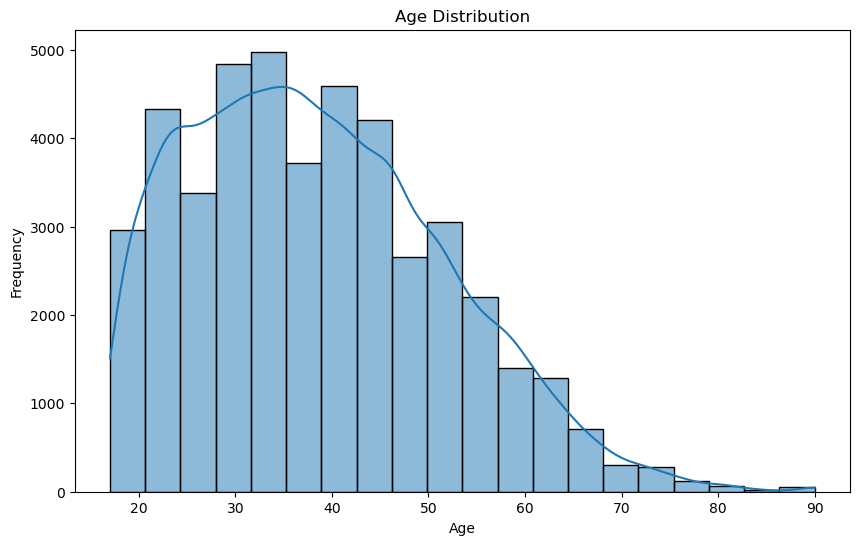

In [13]:
# Age Distribution Plot

plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


Based on the **Age Distribution** visualization above:

- The age distribution follows a roughly bell-shaped curve, with most of the population concentrated in the middle age range.
- The most represented age group appears to be between **25 and 45 years**. This indicates a young to middle-aged workforce as the majority in the dataset.
- After age 45, there's a gradual decline in frequency, showing fewer individuals as age increases, with very few people over 70.
- This trend suggests that most of the dataset's population is likely in their **prime working years**, with fewer entries in the older age brackets.

This age distribution can inform further analysis about how age correlates with income, work type, or hours worked.

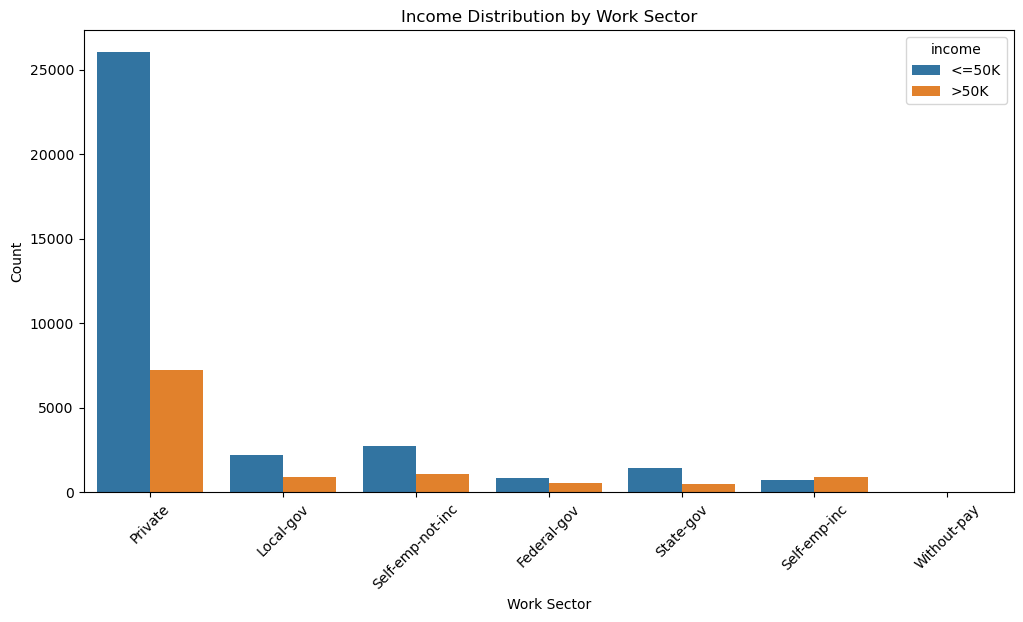

In [14]:
# Work Sectors and Income Levels
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='workclass', hue='income')
plt.title('Income Distribution by Work Sector')
plt.xlabel('Work Sector')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


1. **Private Sector Dominance:** The Private sector is the largest sector, indicating a significant portion of the population is employed in private businesses.
2. **Income Disparity:** There are notable income disparities across sectors, with the Private sector and certain public sectors (Local-gov and Federal-gov) showing higher proportions of individuals earning above $50K.
3. **Further Analysis:** To delve deeper, consider analyzing income distribution by demographic factors, region, and over time to gain a more comprehensive understanding of socioeconomic dynamics.

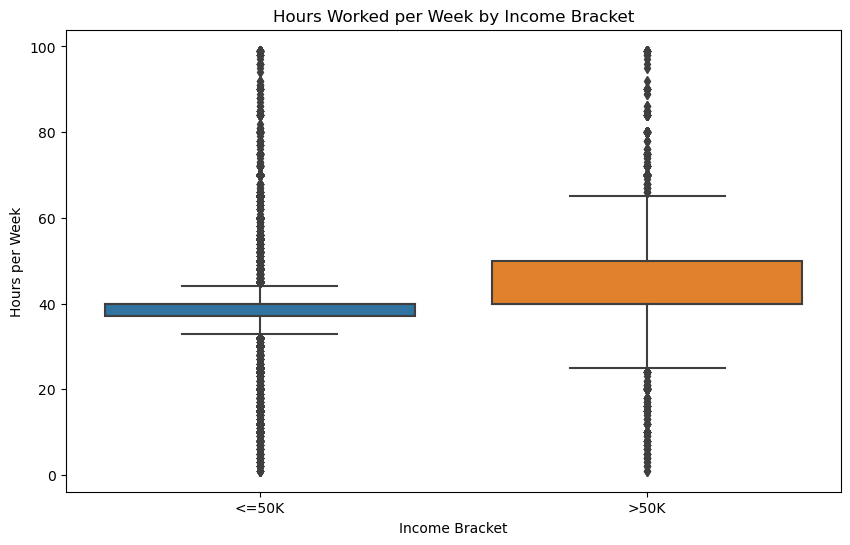

In [15]:
# Hours Worked per Week by Income Level

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='income', y='hours_per_week')
plt.title('Hours Worked per Week by Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Hours per Week')
plt.show()


**Education and Income**

1. **Higher Education, Higher Income:** Individuals with higher levels of education (Bachelors, Masters, Doctorate) are more likely to earn above $50K, suggesting a strong correlation between education and income.

2. **High School Diploma:** Even with a high school diploma (HS-grad), a significant number of individuals still earn above $50K, highlighting the potential for upward mobility without further formal education.

3. **Lower Education Levels:** Individuals with lower levels of education (1st-4th, 5th-6th, 7th-8th, 9th, 10th, 11th) are more likely to earn below $50K, indicating a potential barrier to higher income levels.

4. **Further Analysis:** To delve deeper, consider analyzing income distribution by demographic factors (e.g., age, gender) within each education level and across different regions. This can help identify potential disparities and opportunities for social mobility. 


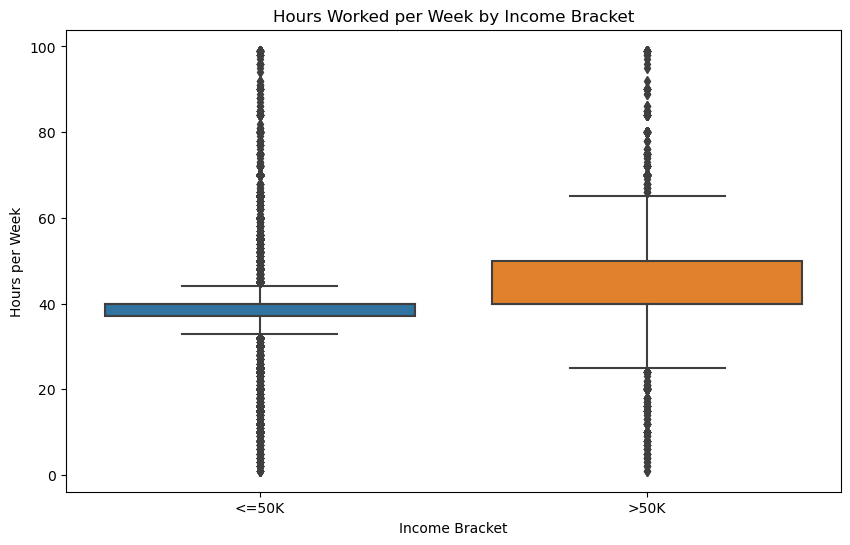

In [16]:
# Hours Worked by Income Level
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='income', y='hours_per_week')
plt.title('Hours Worked per Week by Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Hours per Week')
plt.show()


**Hours Worked and Income**

1. **Income and Hours Worked:** The visualization reveals a complex relationship between income and hours worked. While individuals earning above $50K generally work more hours, there is significant overlap between the two groups.

2. **Hours Worked and Income:** The visualization reveals a complex relationship between income and hours worked. While individuals earning above $50K generally work more hours, there is significant overlap between the two groups.

3. **Myth Debunking:** The visualization challenges the common misconception that working more hours automatically leads to higher income. Many individuals earning above $50K work similar hours to those earning below $50K. This suggests that factors like skillset, education, industry, and job role play a crucial role in determining income.

4. **Further Analysis:** To delve deeper, consider analyzing hours worked by demographic factors (e.g., age, gender, education level) within each income group. Additionally, exploring the relationship between hours worked and specific occupations can provide further insights.


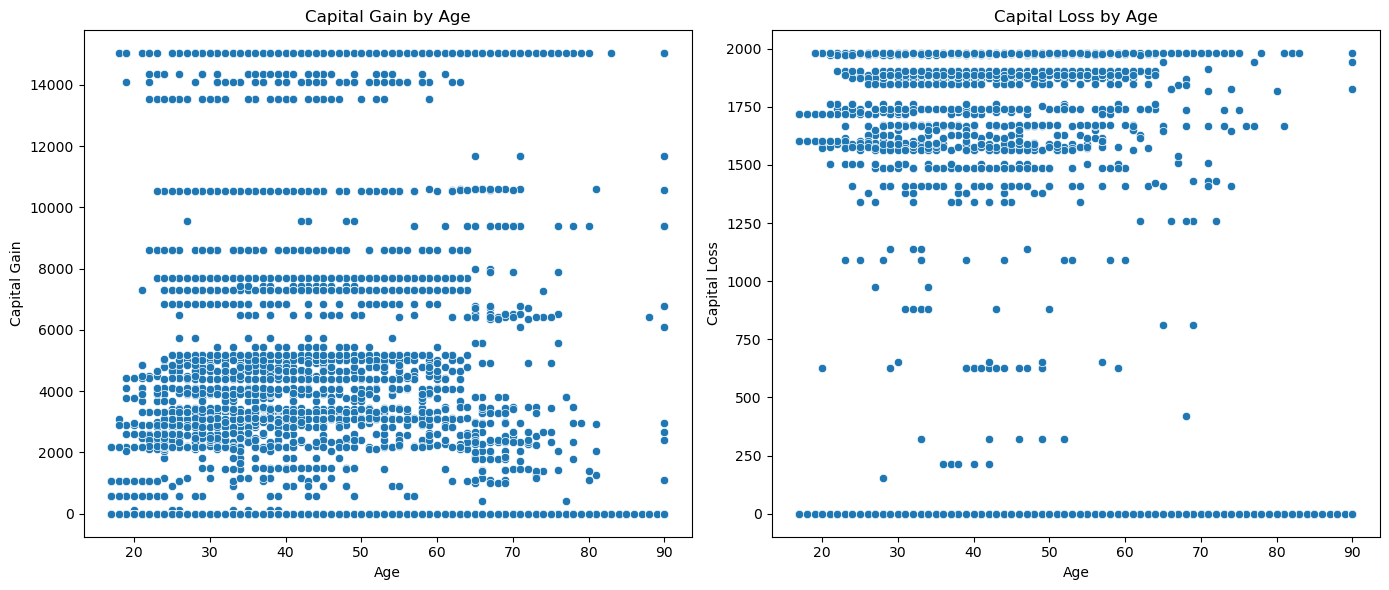

In [17]:
 # Capital Gain and Loss vs Age
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='age', y='capital_gain')
plt.title('Capital Gain by Age')
plt.xlabel('Age')
plt.ylabel('Capital Gain')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='age', y='capital_loss')
plt.title('Capital Loss by Age')
plt.xlabel('Age')
plt.ylabel('Capital Loss')

plt.tight_layout()
plt.show()


**Capital Gain/Loss and Age**

1. **Capital Gain Distribution:** The scatter plot shows a wide range of capital gains across different age groups. While some individuals, especially those in the middle age groups (30s-50s), have experienced significant capital gains, others have not. This suggests that wealth accumulation is not solely determined by age.


2. **Capital Loss Distribution:** Similar to capital gains, capital losses are distributed across various age groups. However, there seems to be a slight concentration of higher capital losses in the younger age groups (20s-30s). This could be due to factors such as higher risk-taking or investing in volatile assets.

3. **Age and Financial Trends:** The visualization suggests that while age can be a factor in wealth accumulation, it's not the sole determinant. Other factors like investment choices, risk tolerance, and income levels likely play a significant role in shaping individual financial outcomes. 

4. **Further Analysis:** To delve deeper, consider analyzing capital gains and losses by income level, occupation, or specific investment types. This can provide insights into the factors driving financial outcomes at different stages of life.


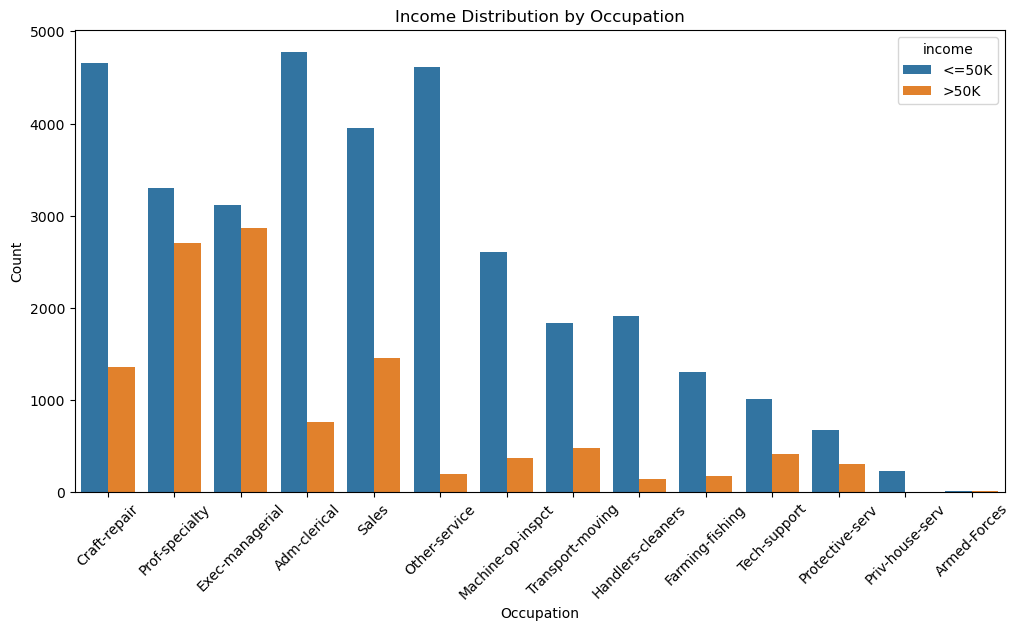

In [18]:
# Occupation and Income Distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='occupation', hue='income', order=df['occupation'].value_counts().index)
plt.title('Income Distribution by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


1. **Occupations** such as "Exec-managerial" and "Prof-specialty" have a higher proportion of high-income individuals.

2. **"Blue-collar"** jobs like "Machine-op-inspct" and "Handlers-cleaners" are more associated with lower-income brackets.

3. **This distribution highlights** income disparities across occupations, with certain professional roles linked to higher earnings.


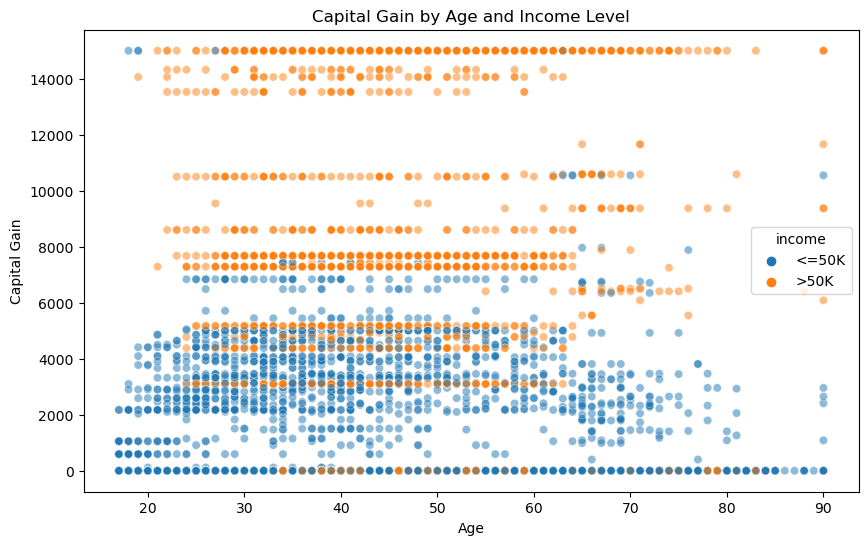

In [19]:
# Age vs. Capital Gain
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='capital_gain', hue='income', alpha=0.5)
plt.title('Capital Gain by Age and Income Level')
plt.xlabel('Age')
plt.ylabel('Capital Gain')
plt.show()


**Higher capital** gains are generally observed among middle-aged to older individuals (ages 40–60).

**Younger individuals** rarely show high capital gains, indicating wealth accumulation often occurs later in life.

**High-income** individuals tend to have higher capital gains, suggesting financial advantages associated with age and income.

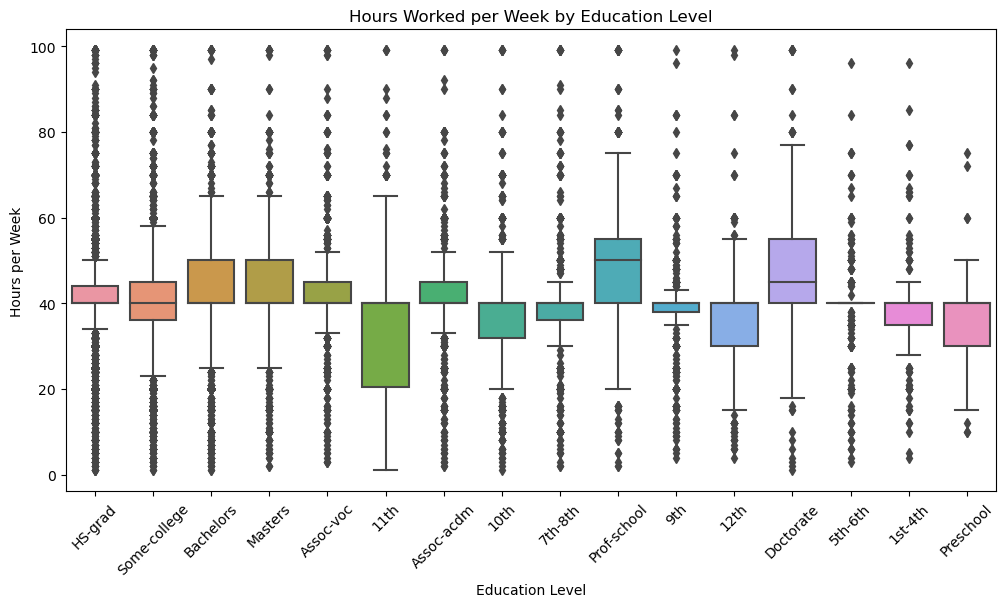

In [20]:
# Hours Worked per Week by Education Level
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='education', y='hours_per_week', order=df['education'].value_counts().index)
plt.title('Hours Worked per Week by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Hours per Week')
plt.xticks(rotation=45)
plt.show()


**The median** hours worked per week are fairly consistent across education levels, around 40 hours.

**Some variance** is seen at lower education levels, suggesting flexible or part-time work is more common.

**Higher education** levels show less variation, likely due to more stable, full-time jobs.

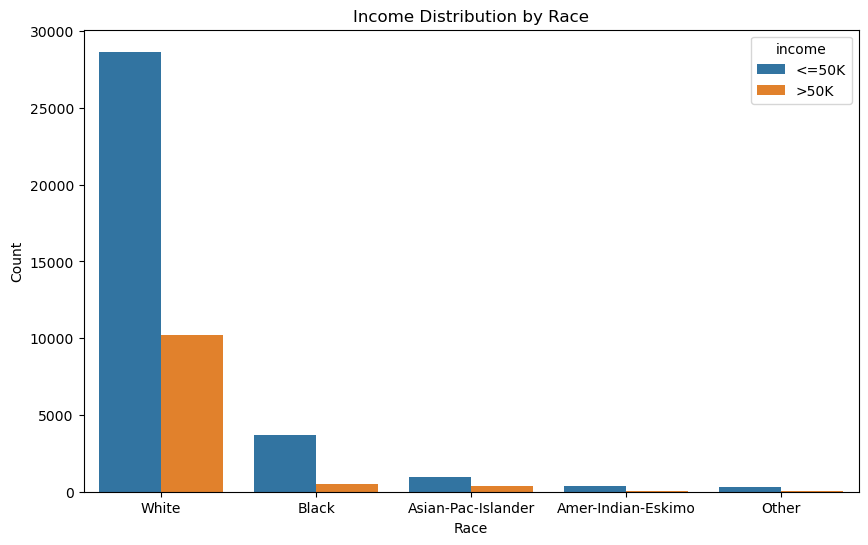

In [21]:
# Race and Income Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='race', hue='income', order=df['race'].value_counts().index)
plt.title('Income Distribution by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

**White individuals** make up the largest group in both income categories.

**Other races,** such as "Black" and "Asian-Pac-Islander," are more represented in the lower-income category.

**This data hints** at potential racial income disparities within the dataset.

**Further analysis could explore socio-economic factors influencing these trends.**

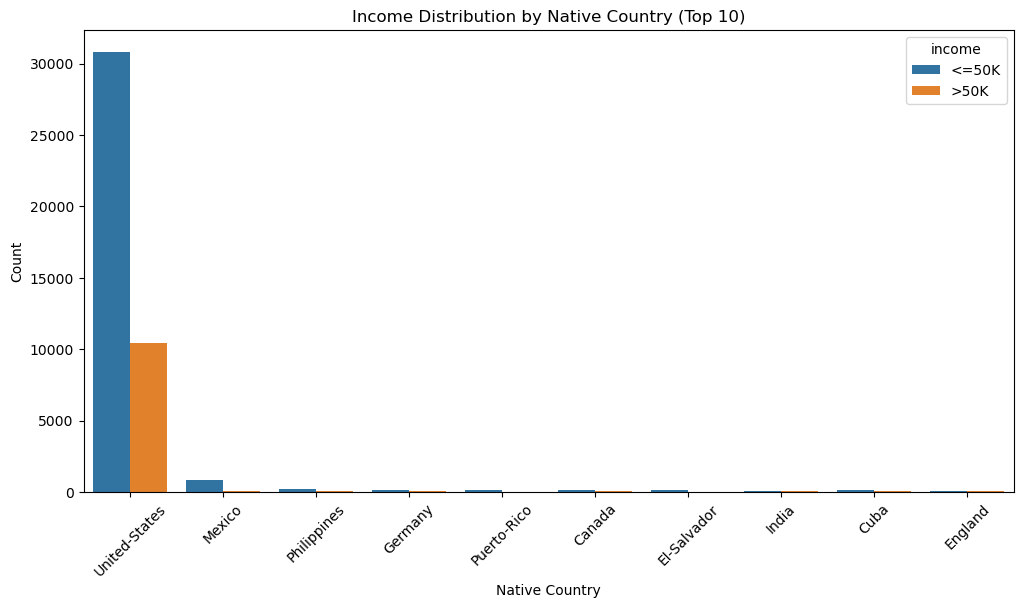

In [22]:
# Native Country and Income Distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='native_country', hue='income', order=df['native_country'].value_counts().index[:10])  # Top 10 countries
plt.title('Income Distribution by Native Country (Top 10)')
plt.xlabel('Native Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


**The United States** is the dominant country in the dataset, with both income groups well-represented.

**Other countries,** such as "Mexico" and "Philippines," show a higher proportion of lower-income individuals.

**This data suggests** income disparities across countries, potentially reflecting different job opportunities or immigration trends.

# Step 5: Conclusion

## Summary

Our analysis reveals notable trends in income distribution within this dataset, highlighting the impact of age, education, occupation, and demographic factors:

1. **Age and Income**: The age group of 25–45 dominates the workforce, with higher income typically seen among middle-aged individuals, suggesting that income increases with experience.

2. **Education and Income**: Higher education strongly correlates with higher income. Those with college degrees, especially in advanced fields, are more likely to be high earners, while those with lower education levels predominantly fall into the lower-income bracket.

3. **Occupation and Income**: Managerial and professional roles are associated with higher income, while blue-collar jobs are mostly in lower-income brackets, highlighting an occupational income divide.

4. **Hours Worked and Income**: While weekly hours worked remain around 40 for most, higher-income individuals tend to work slightly more. However, hours alone are not the primary driver of high income; occupation and education appear more significant.

5. **Demographic Patterns**: Race, marital status, and native country influence income, with disparities evident. White individuals and those from higher-income countries often earn more, whereas some racial minorities and immigrants from specific regions fall into lower-income groups.

### Follow-up Questions

This analysis opens up further questions:

- **What factors most strongly influence high-income earners?**
- **How do income trends vary by race or gender?**
- **Are there patterns between native country and occupation?**

Exploring these questions could offer deeper insights into the socioeconomic drivers of income disparities and inform policies aimed at promoting economic equity.
